In [1]:
import matplotlib
# matplotlib.use('Agg')  
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from meep.materials import Au


# set plot style
from plot.plot_style import set_plot_style
set_plot_style(colors=False, dpi=300)



Using MPI version 4.1, 1 processes


# Run simulation 

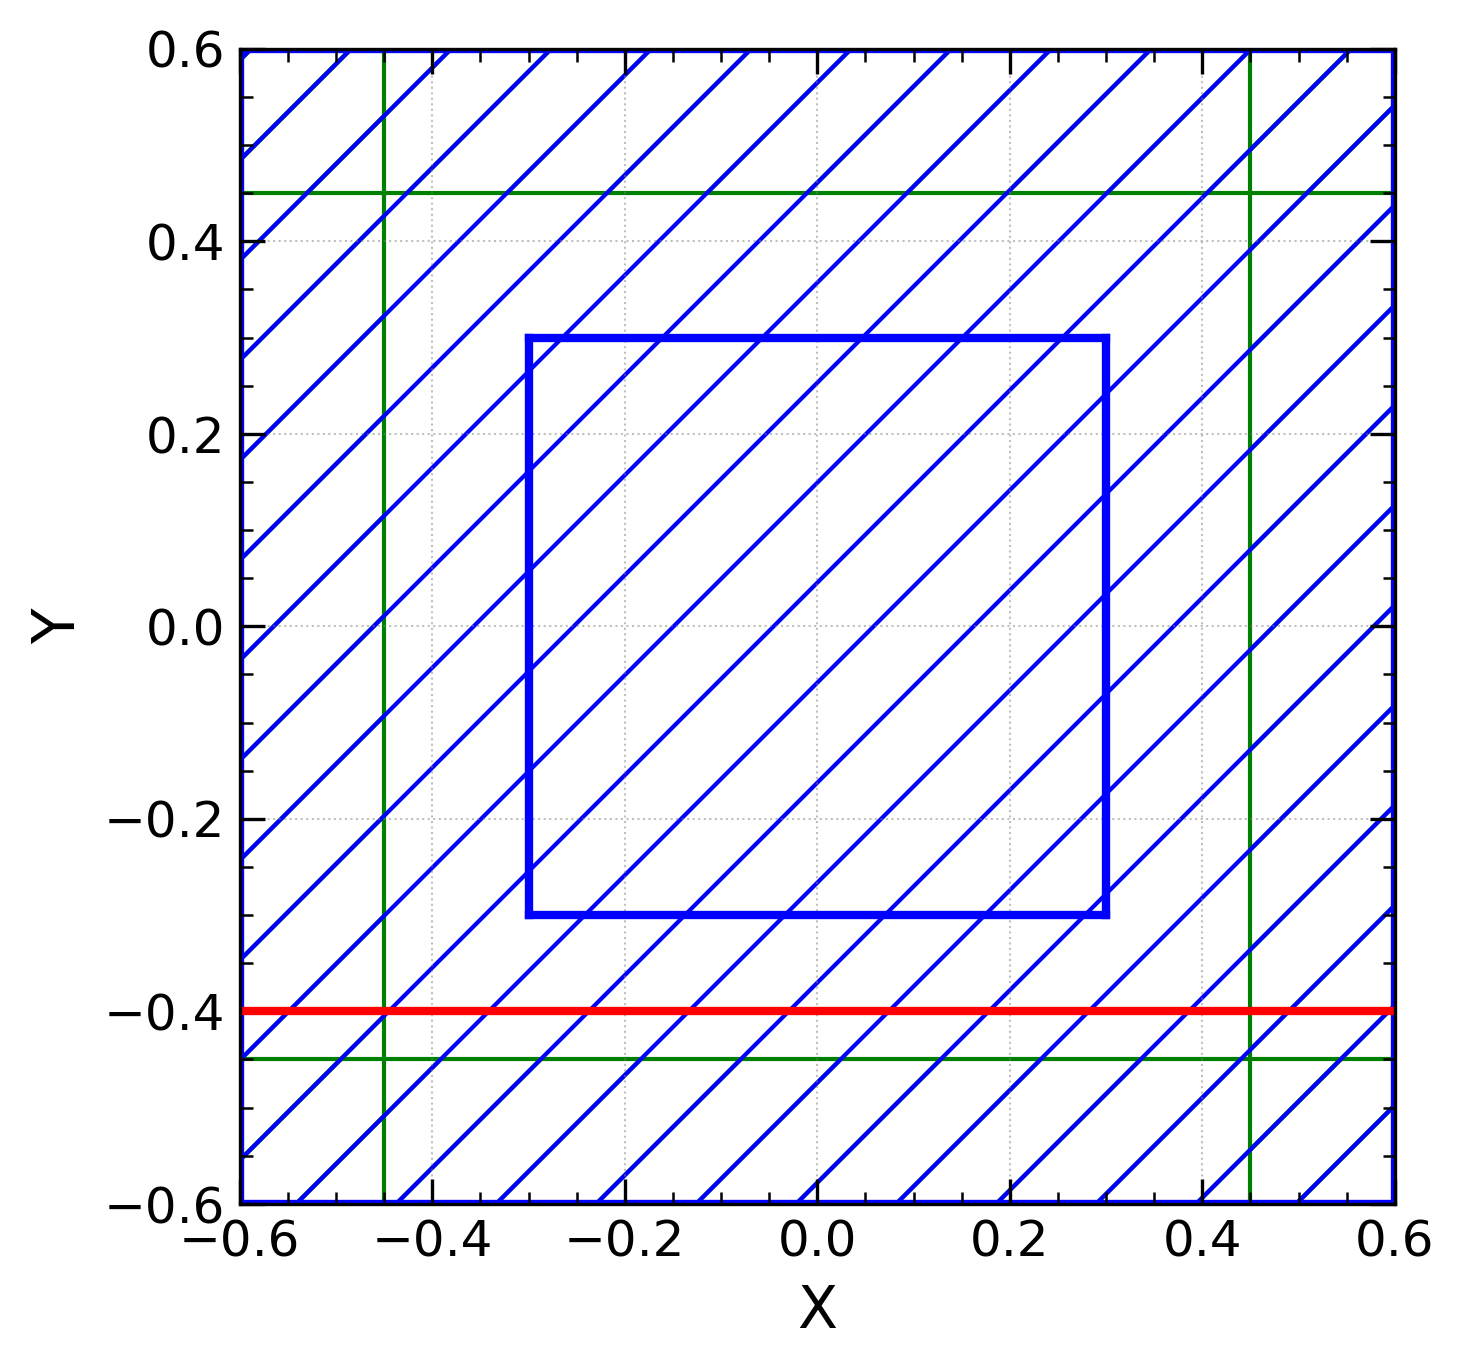

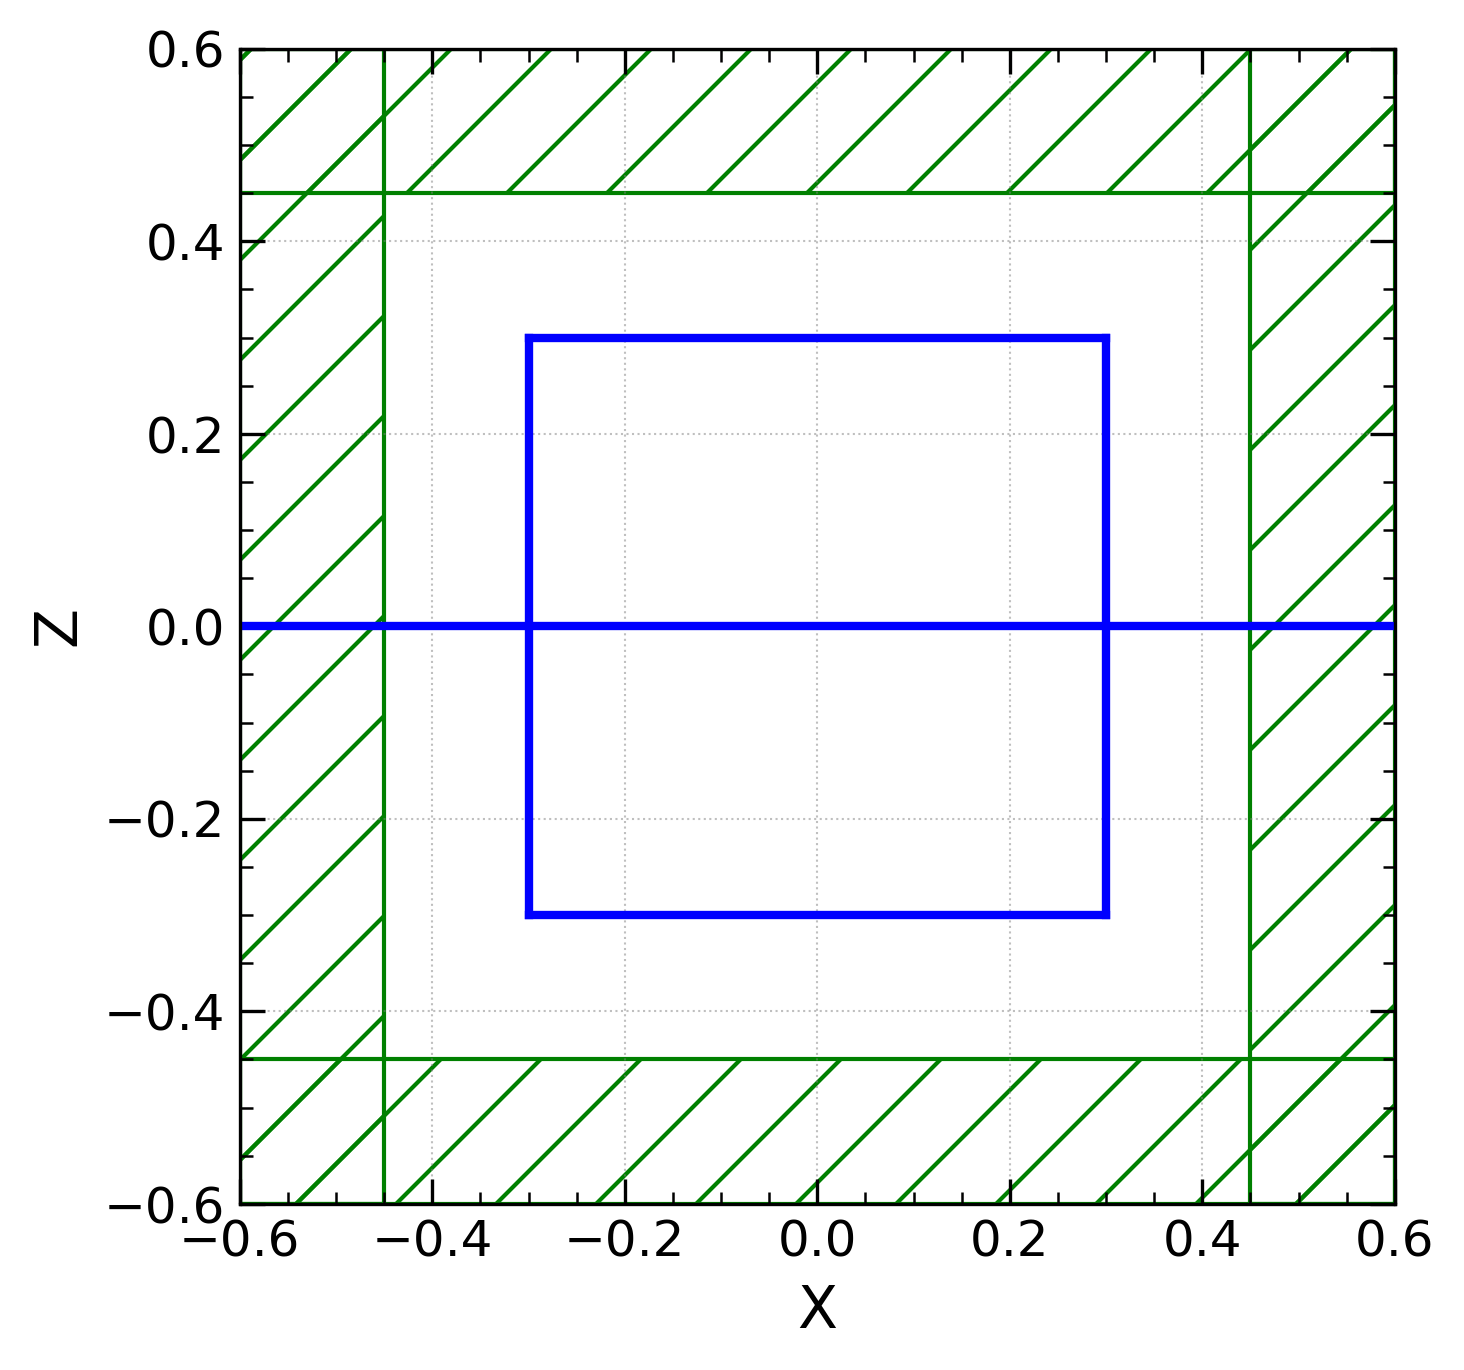

In [2]:

# Set up material properties.  

permitivity = 14.31# for Au -16.50+1.06j
cube_material = mp.Medium(epsilon=permitivity)
length = 0.3 # um


# Setting up simulation domain
S_x = 4*length
S_y = 4 *length
S_z = 4 * length
cell_size = mp.Vector3(S_x, S_y, S_z)


# Frequency range and ofset Bandwith
cent_wl =  0.7 #0.7
min_wl = 0.65#0.65
max_wl = 0.75#0.75
cent_freq = 1/cent_wl
freq_width = 1/min_wl - 1/max_wl




# define offset of sourc
offset = 0.2

# Define source position
source_postion =  -S_y*0.5  + offset


# Define a gauassian source 
gaussian_pulse = mp.GaussianSource(frequency = cent_freq, 
                                       fwidth = 2*freq_width,
                                        is_integrated = True )


source = [mp.Source(src = gaussian_pulse, 
                    component = mp.Ez, 
                    center = mp.Vector3(0, source_postion),
                    size = mp.Vector3(S_x,0, S_y))]


# set simulation object 
step_size = min([length, min_wl])/20
resolution= 1/step_size
pmls = [mp.PML(thickness = 10*step_size)]


sim = mp.Simulation(resolution= resolution,
                    cell_size= cell_size,
                    sources = source,
                    boundary_layers = pmls,
                    geometry = [],
                    # Courant=0.1
                    )

# Add monitors 
# We are defining wavelenght monitors (DFT monitors)
wls = np.linspace(min_wl,max_wl, 41)
freqs = 1/wls
dft_freqs = [1/min_wl, cent_freq,1/max_wl ]

dft_field = sim.add_dft_fields([mp.Ez],
                              dft_freqs,
                              center = mp.Vector3(),
                             size= mp.Vector3(S_x, S_y) )




# setting up flux monitors 
box_size = length*2

box_mx = sim.add_flux(freqs, mp.FluxRegion(center = mp.Vector3(x = -box_size / 2), size = mp.Vector3(0,box_size,box_size)))
box_px = sim.add_flux(freqs, mp.FluxRegion(center = mp.Vector3(x = box_size / 2), size = mp.Vector3(0,box_size,box_size)))
box_my = sim.add_flux(freqs,mp.FluxRegion(center=mp.Vector3(y=-box_size/2),size=mp.Vector3(x = box_size, z = box_size)))
box_py = sim.add_flux(freqs,mp.FluxRegion(center=mp.Vector3(y=box_size/2),size=mp.Vector3(x = box_size, z = box_size)))
box_mz = sim.add_flux(freqs,mp.FluxRegion(center=mp.Vector3(z=-box_size/2),size=mp.Vector3(x = box_size, y = box_size)))
box_pz = sim.add_flux(freqs,mp.FluxRegion(center=mp.Vector3(z=box_size/2),size=mp.Vector3(x = box_size, y = box_size)))



# visualize the simulation domain
sim.plot2D(output_plane = mp.Volume(center = mp.Vector3(), size = mp.Vector3(S_x,S_y)))
plt.savefig("simXY_empty.png")
plt.show()
plt.close()

sim.plot2D(output_plane = mp.Volume(center = mp.Vector3(), size = mp.Vector3(S_x,0,S_z)))
plt.savefig("simXZ_empty.png")
plt.show()
plt.close()


In [3]:
sim.run(until_after_sources = mp.stop_when_fields_decayed(10, mp.Ez, mp.Vector3(0,0,box_size/2),1e-4))


-----------
Initializing structure...
time for choose_chunkdivision = 0.00242149 s
Working in 3D dimensions.


Computational cell is 1.2 x 1.2 x 1.2 with resolution 66.6667
time for set_epsilon = 0.718623 s
-----------
on time step 158 (time=1.185), 0.0253848 s/step
on time step 386 (time=2.895), 0.0175849 s/step
on time step 611 (time=4.5825), 0.0178239 s/step
on time step 856 (time=6.42), 0.0163475 s/step
on time step 1053 (time=7.8975), 0.0204981 s/step
on time step 1167 (time=8.7525), 0.0353283 s/step
field decay(t = 10.004999999999999): 0.0675266841500774 / 0.0675266841500774 = 1.0
on time step 1360 (time=10.2), 0.020787 s/step
on time step 1583 (time=11.8725), 0.017951 s/step
on time step 1833 (time=13.7475), 0.0160839 s/step
on time step 2085 (time=15.6375), 0.015878 s/step
on time step 2324 (time=17.43), 0.0168174 s/step
on time step 2552 (time=19.14), 0.0176032 s/step
field decay(t = 20.009999999999998): 0.2501222109628814 / 0.2501222109628814 = 1.0
on time step 2773 (time=20.7975), 0.0181206 s/step
on time step 3017 (time=22.6275), 0.0164838 s/step
on time step 3246 (time=24.345), 0.0

In [4]:

# Plot DFT monitors
for f in range(len(dft_freqs)):
    Ez_f = sim.get_dft_array(dft_field, mp.Ez, f)
    plt.imshow(np.real(Ez_f), extent = [-S_y/2, S_y/2, -S_x/2, S_x/2])
    plt.savefig(f"Ez_f{1./dft_freqs[f]}.png")

    plt.close()

# Save empty simulation domain flux data 

In [5]:
box_mx_data_empty = sim.get_flux_data(box_mx)
box_px_data_empty = sim.get_flux_data(box_px)
box_my_data_empty = sim.get_flux_data(box_my)
box_py_data_empty = sim.get_flux_data(box_py)
box_mz_data_empty = sim.get_flux_data(box_mz)
box_pz_data_empty = sim.get_flux_data(box_pz)


# Incident intensity of incidenting flux.
 Reveals the frequency components in the incident pulse

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_241174/2853090455.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("Wavelength($\mu m$)")


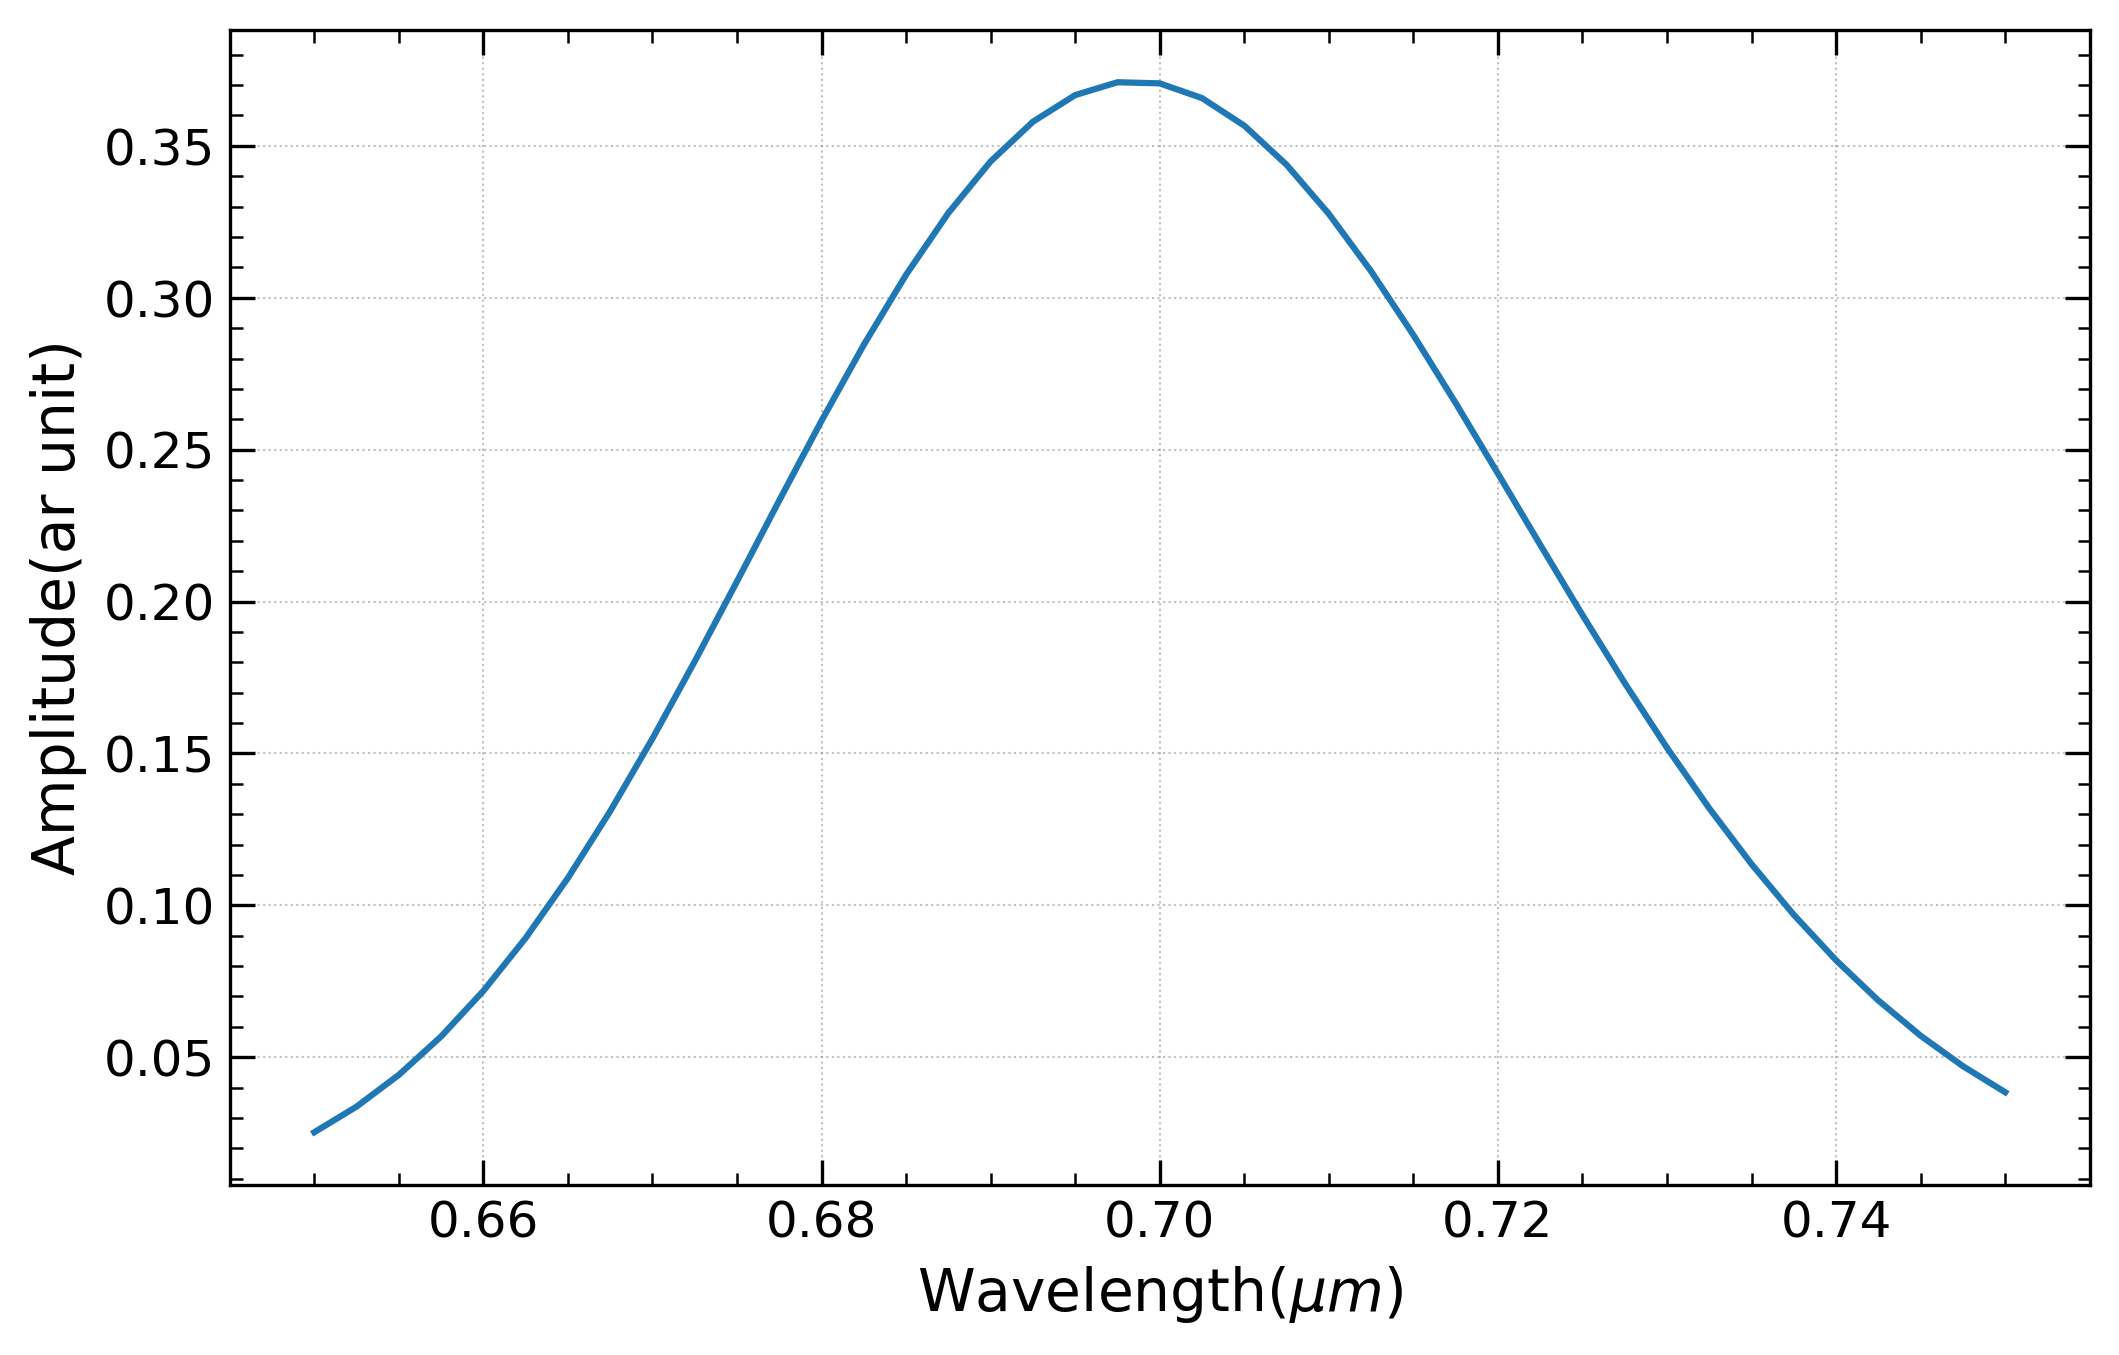

In [6]:
incident_intensity = np.array(mp.get_fluxes(box_my))/(box_size**2)
plt.plot(wls,incident_intensity)
plt.savefig('Inc_Intensity.png')
plt.xlabel("Wavelength($\mu m$)")
plt.ylabel("Amplitude(ar unit)")
plt.show()
plt.close()

In [7]:
sim.reset_meep()

reset  the simulation 

In [8]:
# sphere_refractive_index = 2.0

L = length

cube = mp.Block(
    size=mp.Vector3(L, L, L),    # full lengths in x, y, and z
    center=mp.Vector3(0,0,0),
    material=cube_material
)

geometry = [cube]


# geometry = [mp.Sphere(material= cube_material, center = mp.Vector3(), radius = length)]

New simulation with material 

In [9]:
# sim = mp.Simulation(resolution= resolution,
#                     cell_size= cell_size,
#                     sources = source,
#                     boundary_layers = pmls,
#                     geometry = geometry,
#                     # Courant=0.1
#                     )

sim = mp.Simulation(resolution = resolution,
                    cell_size = cell_size,
                    sources = source,
                    boundary_layers = pmls,
                    geometry = geometry,
                    Courant = 0.3)
# sim = mp.Simulation(resolution= resolution,
#                     cell_size= cell_size,
#                     sources = source,
#                     boundary_layers = pmls,
#                     geometry = [],
#                     # Courant=0.1
#                     )


-----------
Initializing structure...
time for choose_chunkdivision = 0.000489551 s
Working in 3D dimensions.
Computational cell is 1.2 x 1.2 x 1.2 with resolution 66.6667


     block, center = (0,0,0)
          size (0.3,0.3,0.3)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (14.31,14.31,14.31)
time for set_epsilon = 1.49367 s
-----------


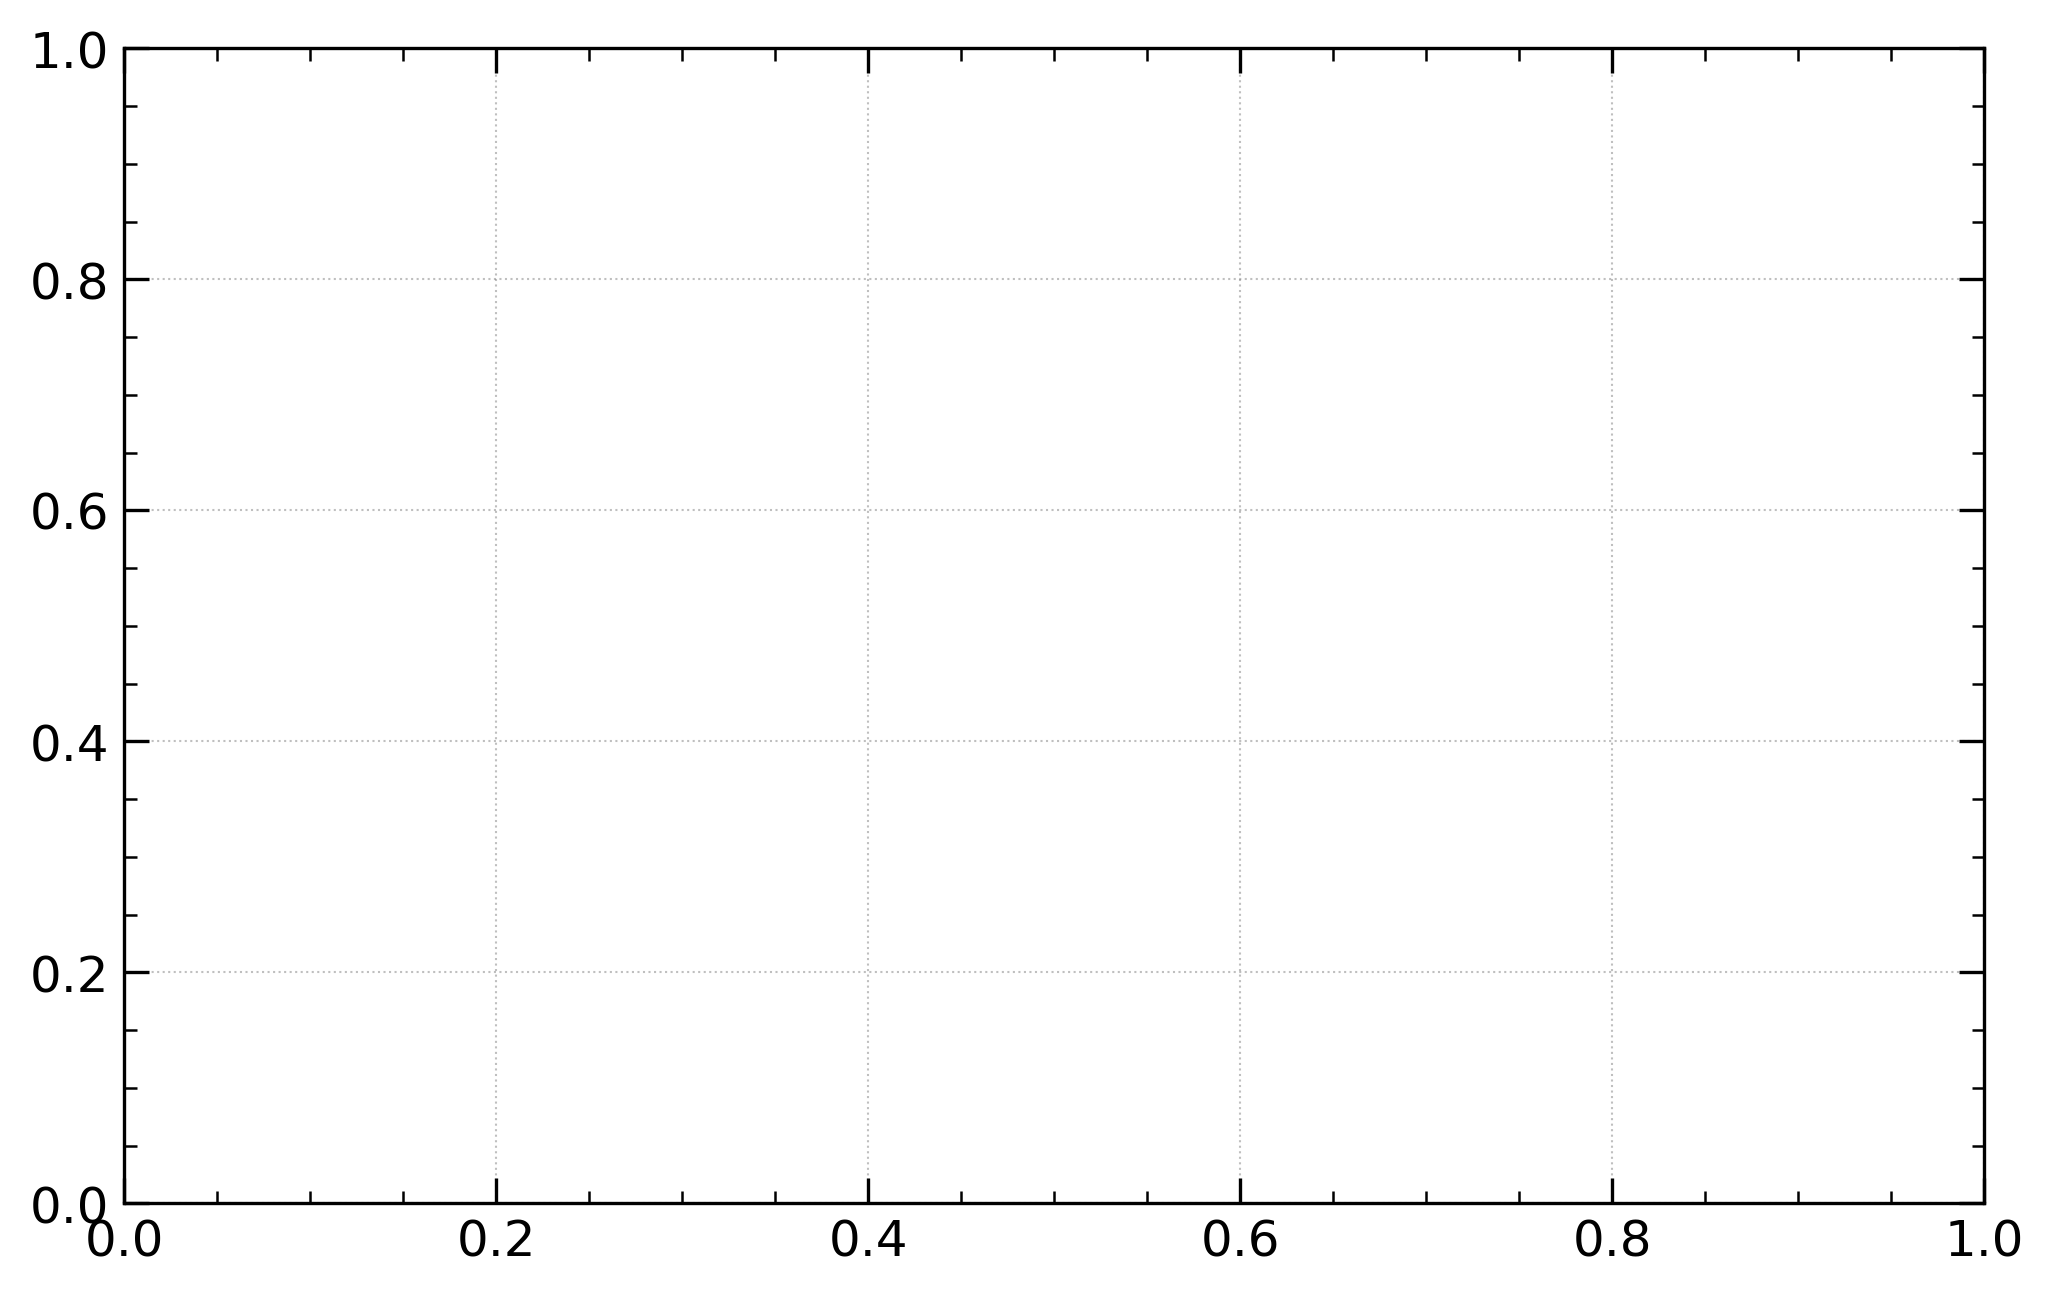

In [10]:


box_size = length*2

dft_field = sim.add_dft_fields([mp.Ez],
                              dft_freqs,
                              center = mp.Vector3(),
                             size= mp.Vector3(S_x, S_y) )

# Adding flux monitors 
box_mx = sim.add_flux(freqs, mp.FluxRegion(center= mp.Vector3(x = -box_size/2),size = mp.Vector3(0, box_size,box_size)))
box_px = sim.add_flux(freqs, mp.FluxRegion(center= mp.Vector3(x = box_size/2),size = mp.Vector3(0, box_size,box_size)))
box_my = sim.add_flux(freqs, mp.FluxRegion(center= mp.Vector3(y =- box_size/2),size = mp.Vector3(x =box_size,z=box_size)))
box_py = sim.add_flux(freqs, mp.FluxRegion(center= mp.Vector3(y = box_size/2),size = mp.Vector3(x =box_size,z=box_size)))
box_mz = sim.add_flux(freqs, mp.FluxRegion(center= mp.Vector3(z =- box_size/2),size = mp.Vector3(x =box_size,y=box_size)))
box_pz = sim.add_flux(freqs, mp.FluxRegion(center= mp.Vector3(z = box_size/2),size = mp.Vector3(x =box_size,y=box_size)))


sim.load_minus_flux_data(box_mx, box_mx_data_empty)
sim.load_minus_flux_data(box_px, box_px_data_empty)
sim.load_minus_flux_data(box_my, box_my_data_empty)
sim.load_minus_flux_data(box_py, box_py_data_empty)
sim.load_minus_flux_data(box_mz, box_mz_data_empty)
sim.load_minus_flux_data(box_pz, box_pz_data_empty)

animate = mp.Animate2D(fields=mp.Ez,
                       realtime=True,
                       output_plane = mp.Volume(center = mp.Vector3(), size = mp.Vector3(S_x, S_y))
)
                    #    field_parameters={'alpha':0.8, 'cmap':'RdBu', 'interpolation':'none'},
                    #    boundary_parameters={'hatch':'o', 'linewidth':1.5, 'facecolor':'y', 'edgecolor':'b', 'alpha':0.3})

# sim.run(mp.at_every(1,animate),until=25)





In [11]:
sim.plot2D(output_plane =mp.Volume(center=mp.Vector3(), size = mp.Vector3(S_x,0,  S_z)))
plt.savefig("simXYwithSphere.png")
plt.close()

sim.plot2D(output_plane =mp.Volume(center=mp.Vector3(), size = mp.Vector3(S_x,0,  S_z)))
plt.savefig("simXZwithSphere.png")
plt.close()

     block, center = (0,0,0)
          size (0.3,0.3,0.3)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (14.31,14.31,14.31)
     block, center = (0,0,0)
          size (0.3,0.3,0.3)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (14.31,14.31,14.31)


# Run

In [12]:
sim.run(mp.at_every(0.1,animate),until_after_sources = mp.stop_when_fields_decayed(10, mp.Ez, mp.Vector3(0,0,box_size/2),1e-4))

# save animation 



on time step 1 (time=0.0045), 7.29389 s/step
     block, center = (0,0,0)
          size (0.3,0.3,0.3)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (14.31,14.31,14.31)
on time step 44 (time=0.198), 0.1496 s/step
on time step 110 (time=0.495), 0.0726939 s/step
on time step 176 (time=0.792), 0.0742763 s/step
on time step 242 (time=1.089), 0.0730267 s/step
on time step 308 (time=1.386), 0.0720431 s/step
on time step 374 (time=1.683), 0.0665287 s/step
on time step 440 (time=1.98), 0.0673929 s/step
on time step 506 (time=2.277), 0.0707003 s/step
on time step 572 (time=2.574), 0.0675972 s/step
on time step 638 (time=2.871), 0.0678827 s/step
on time step 704 (time=3.168), 0.0695641 s/step
on time step 762 (time=3.429), 0.0692636 s/step
on time step 814 (time=3.663), 0.0939542 s/step
on time step 880 (time=3.96), 0.0768452 s/step
on time step 946 (time=4.257), 0.0797829 s/step
on time step 990 (time=4.455), 0.0971583 s/step
on time step 1055 (time=4

In [13]:
animate.to_mp4(fps=10, filename="animation.mp4")

Generating MP4...


<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_241174/3295812429.py:15: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("Wavelength($\mu m$)")
/tmp/ipykernel_241174/3295812429.py:16: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel("$\sigma$_{$\mu m^2$}")


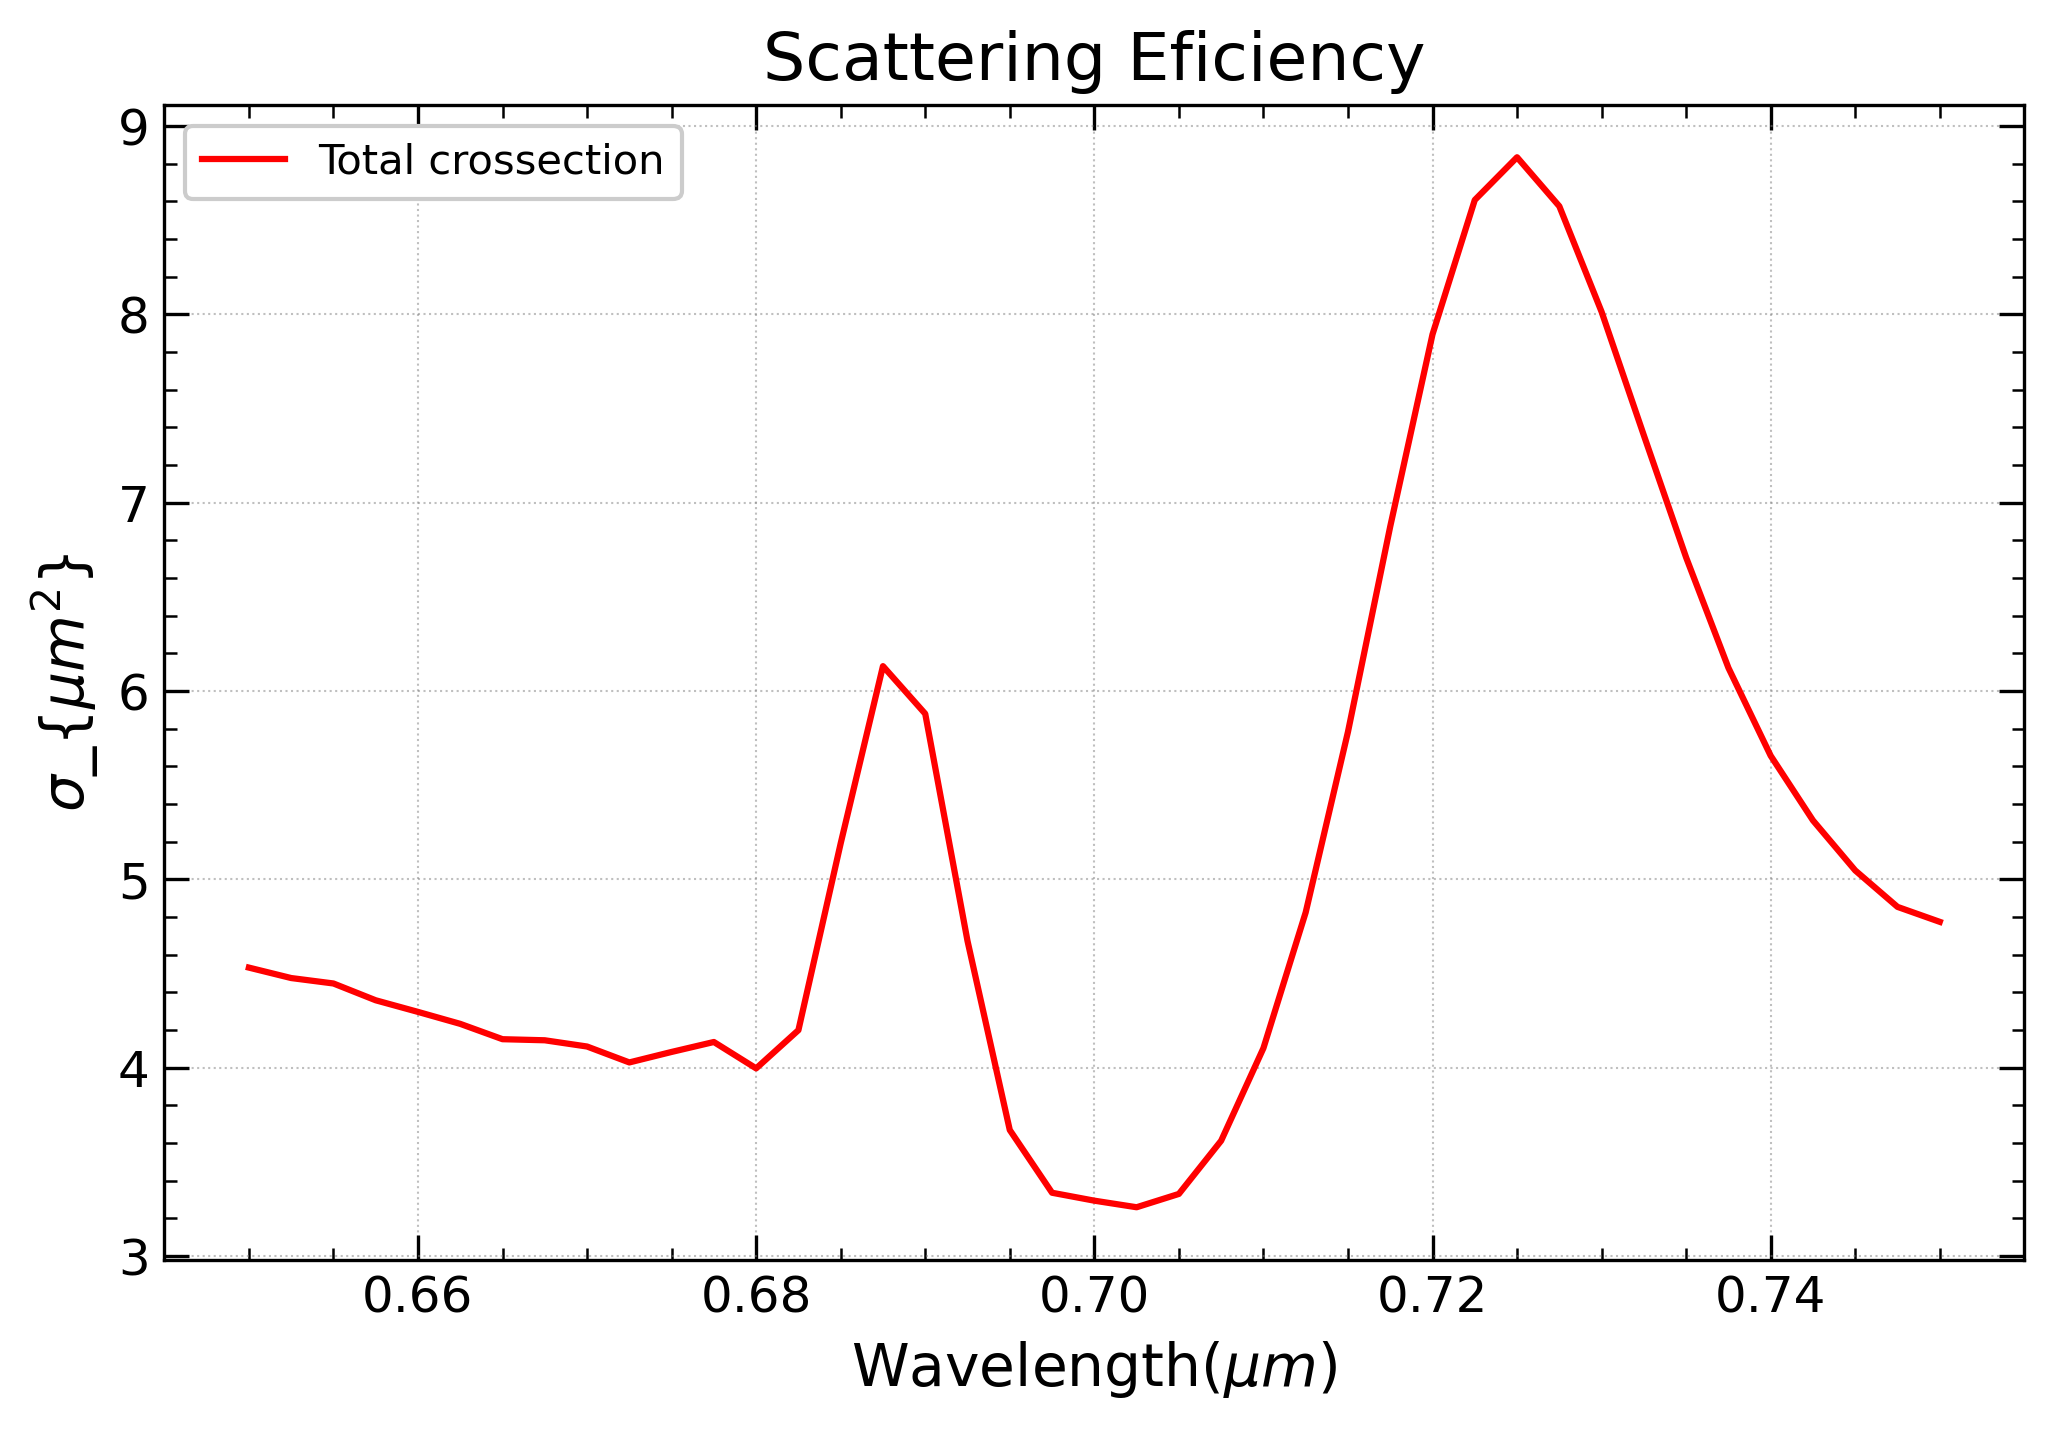

In [14]:


box_mx_flux = np.array(mp.get_fluxes(box_mx))
box_px_flux = np.array(mp.get_fluxes(box_px))
box_my_flux = np.array(mp.get_fluxes(box_my))
box_py_flux = np.array(mp.get_fluxes(box_py))
box_mz_flux = np.array(mp.get_fluxes(box_mz))
box_pz_flux = np.array(mp.get_fluxes(box_pz))

total_flux = -box_mx_flux + box_px_flux -box_my_flux+ box_py_flux  -box_mz_flux+ box_pz_flux
crossection = total_flux/incident_intensity



plt.figure()
plt.plot(wls, crossection/ (length**2), "-", color = 'red', label = ("Total crossection"))
plt.xlabel("Wavelength($\mu m$)")
plt.ylabel("$\sigma$_{$\mu m^2$}")
plt.title("Scattering Eficiency")
plt.legend()
plt.savefig("Scattering_spectrum.png")





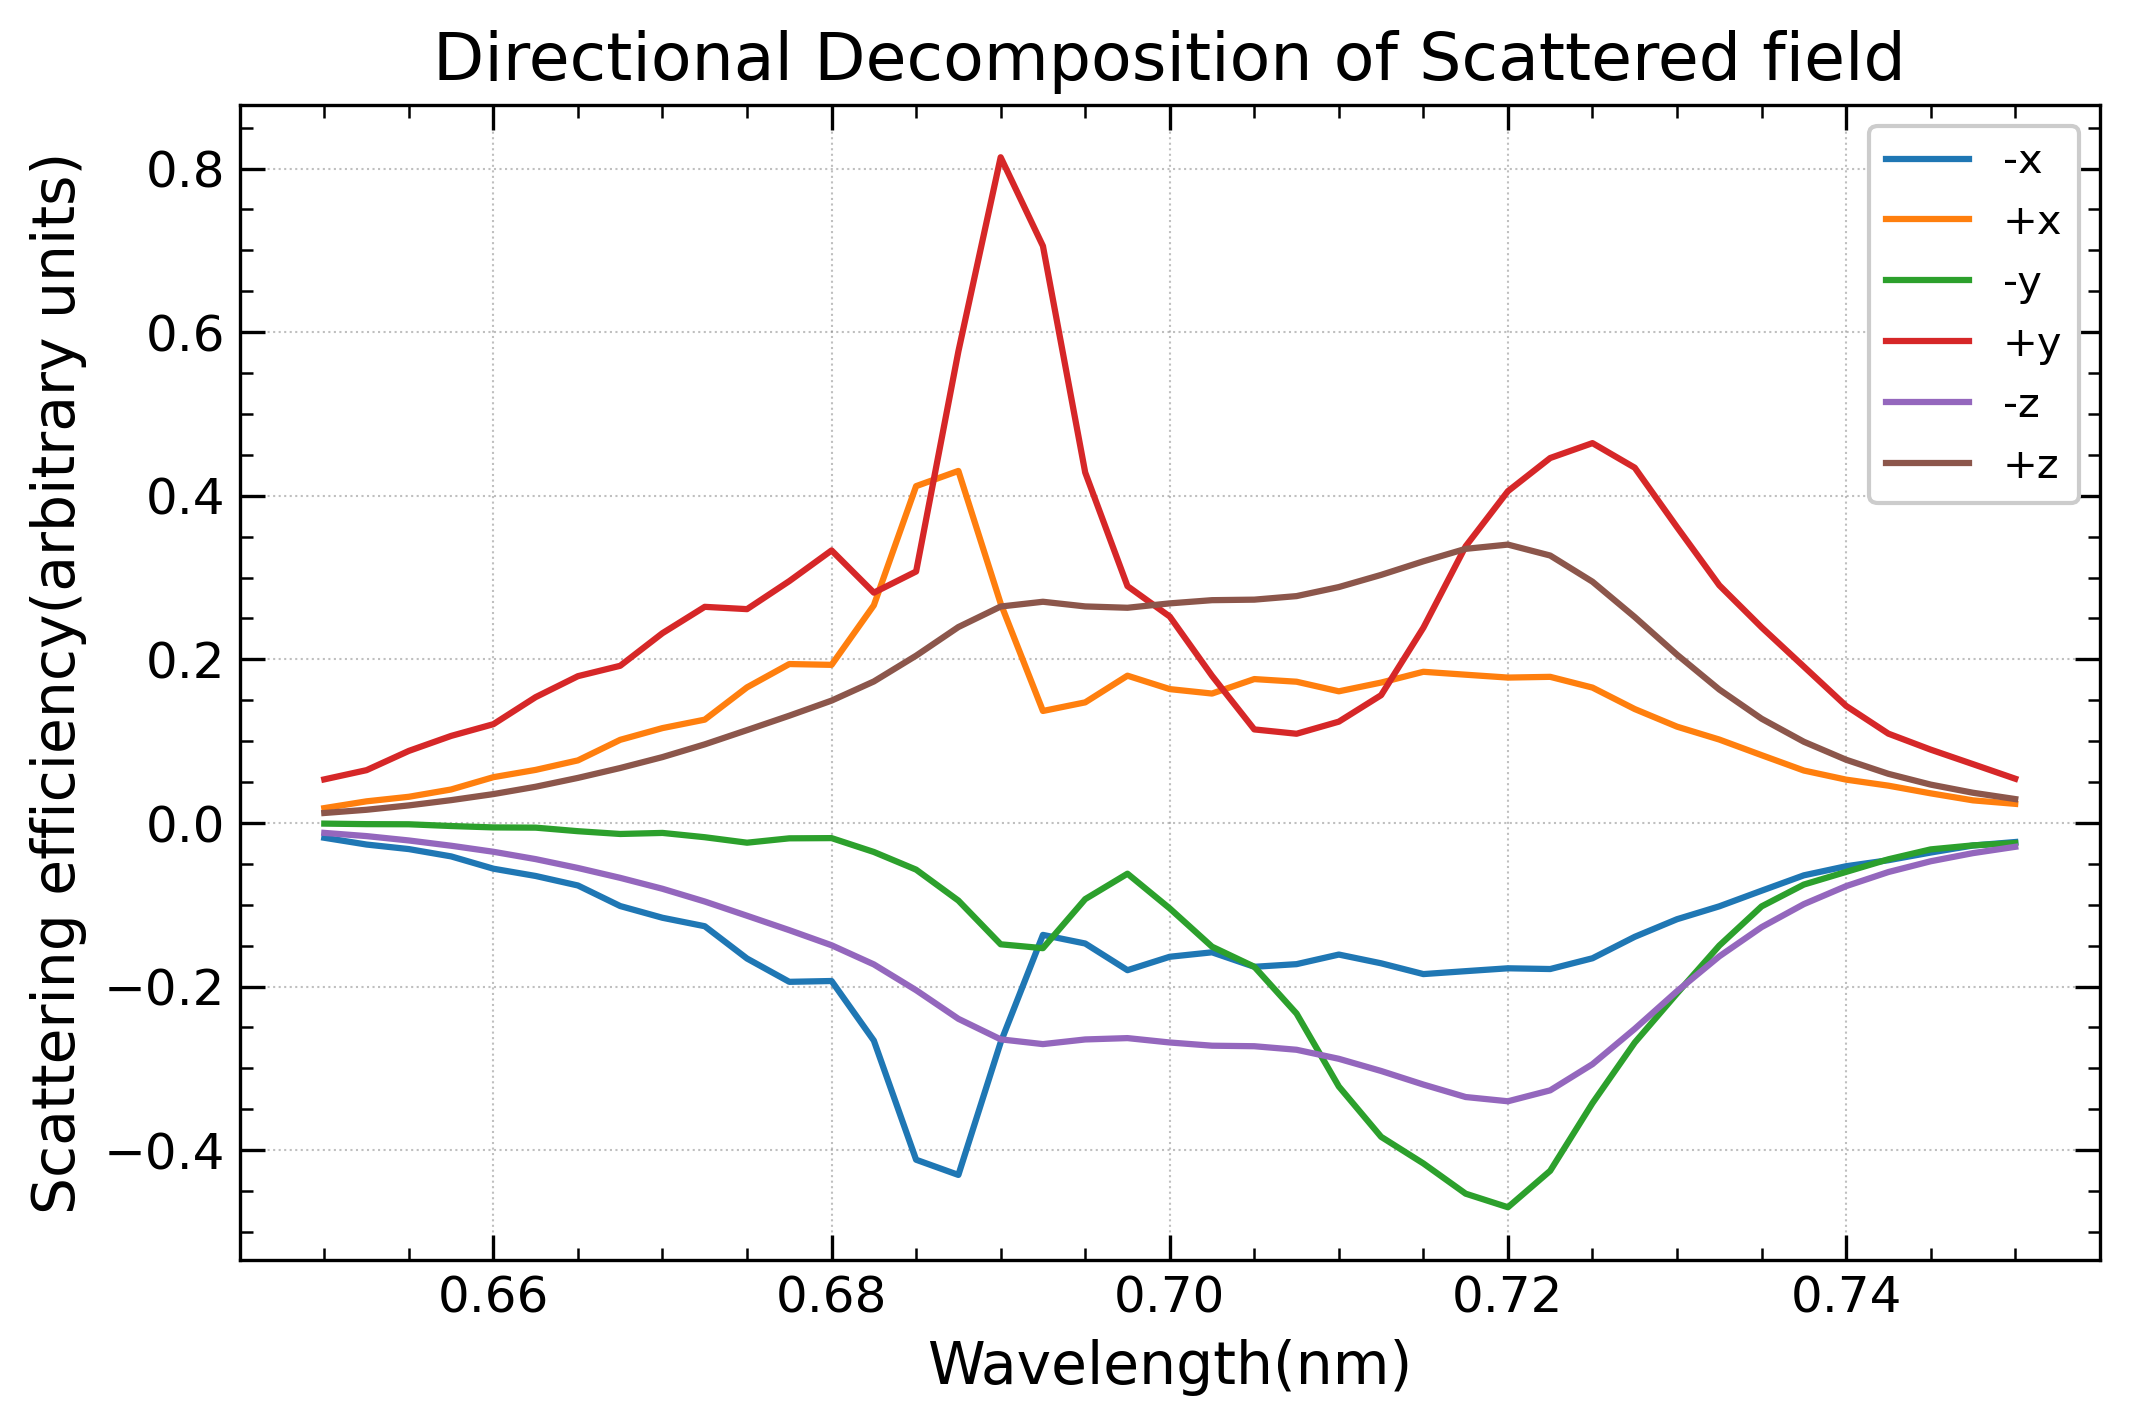

In [15]:
L = length

plt.figure()
# plt.plot(wls, crossection/ (L**2), "x", color = 'red', label = ("Total crossection"))
plt.plot(wls, box_mx_flux/ (L**2),  label = ("-x"))
plt.plot(wls, box_px_flux/ (L**2), label = ("+x"))
plt.plot(wls, box_my_flux/ (L**2),  label = ("-y"))
plt.plot(wls, box_py_flux/ (L**2),   label = ("+y"))
plt.plot(wls, box_mz_flux/ (L**2),  label = ("-z"))
plt.plot(wls, box_pz_flux/ (L**2),  label = ("+z"))
plt.xlabel("Wavelength(nm)")
plt.ylabel("Scattering efficiency(arbitrary units)")
plt.legend()
plt.title('Directional Decomposition of Scattered field')
plt.savefig("Scattering_directional_decomposition.png")
plt.show()


In [16]:
print("Au valid freq range:", Au.valid_freq_range)

Au valid freq range: FreqRange(min=0.16131113692089302, max=4.0327458966810505)


In [17]:
# sim.plot3D()              # this will draw into the Agg canvas
# plt.savefig("3Dfield.png", dpi=150)

In [18]:
# import numpy as np
# import scipy.special as sp
# import scipy.interpolate as interp
# import matplotlib.pyplot as plt
# import scipy.optimize as op
# import matplotlib

# matplotlib.rcParams.update({'font.size': 15})

# HBAR = 1.0545718E-34
# ME = 9.10938356E-31
# E0 = 1.60217662E-19
# NE = 5.541318196761572e28
# NE = 5.476415562682574e28

# mu0 = 1.2566370614E-06;
# ep0 = 8.85418781762E-12;
# h = 4.135667516000000e-15;
# c = 3e8;


# def x_Bessel_prime(n, x, j):
#     xj_prime = x * j[:, 1] - n * j[:, 0];
#     return xj_prime;

# def Mie_Solver(Sphere_Radius, Sphere_refractive_index, Wavelengths, RefractiveIndex_Outside = 1, max_iter = 20):
#     c = 3e8;
#     N_m = RefractiveIndex_Outside;  # vacuum
#     Lambda = Wavelengths
#     Freq = c / Lambda;
#     omega = 2 * np.pi * Freq;

#     k = 2 * np.pi * N_m / Lambda;
#     x = Sphere_Radius * k;

#     if hasattr(Sphere_refractive_index, "__len__"):
#         N_s = Sphere_refractive_index
#     else:
#         N_s = Wavelengths / Wavelengths * Sphere_refractive_index

#     N = N_s / N_m;

#     j_mx = np.zeros([len(omega), 3], dtype='complex128');
#     j_x = np.zeros([len(omega), 3], dtype='complex128');
#     y_x = np.zeros([len(omega), 3], dtype='complex128');
#     xjx_prime = np.zeros([len(omega), 3], dtype='complex128');
#     NxjNx_prime = np.zeros([len(omega), 3], dtype='complex128');
#     h_x = np.zeros([len(omega), 3], dtype='complex128');
#     xhx_prime = np.zeros([len(omega), 3], dtype='complex128');

#     I = 1j

#     i = 0;
#     j_x[:, 0] = sp.jn(i + 0.5, x) * np.sqrt(np.pi / (2 * x))
#     j_mx[:, 0] = sp.jn(i + 0.5, N * x) * np.sqrt(np.pi / (2 * N * x))
#     y_x[:, 0] = sp.yv(i + 0.5, x) * np.sqrt(np.pi / (2 * x))
#     h_x[:, 0] = j_x[:, 0] + I * y_x[:, 0];

#     Q_sca = 0;
#     Q_ext = 0;

#     A_n_track = []
#     B_n_track = []

#     for i in range(1, max_iter + 1):
#         # print(i)

#         j_x[:, 2] = j_x[:, 1];
#         j_x[:, 1] = j_x[:, 0];

#         j_mx[:, 2] = j_mx[:, 1];
#         j_mx[:, 1] = j_mx[:, 0];

#         y_x[:, 2] = y_x[:, 1];
#         y_x[:, 1] = y_x[:, 0];

#         j_x[:, 0] = sp.jv(i + 0.5, x) * np.sqrt(np.pi / (2 * x))
#         j_mx[:, 0] = sp.jv(i + 0.5, N * x) * np.sqrt(np.pi / (2 * N * x))
#         y_x[:, 0] = sp.yv(i + 0.5, x) * np.sqrt(np.pi / (2 * x))

#         h_x[:, 2] = h_x[:, 1];
#         h_x[:, 1] = h_x[:, 0];
#         h_x[:, 0] = j_x[:, 0] + I * y_x[:, 0];

#         xjx_prime[:, 0] = x_Bessel_prime(i, x, j_x);
#         NxjNx_prime[:, 0] = x_Bessel_prime(i, N * x, j_mx);
#         xhx_prime[:, 0] = x_Bessel_prime(i, x, h_x);

#         A_n = N * N * j_mx[:, 0] * xjx_prime[:, 0] - j_x[:, 0] * NxjNx_prime[:, 0];
#         A_n = - A_n / (N * N * j_mx[:, 0] * xhx_prime[:, 0] - h_x[:, 0] * NxjNx_prime[:, 0]);

#         B_n = j_mx[:, 0] * xjx_prime[:, 0] - j_x[:, 0] * NxjNx_prime[:, 0];
#         B_n = - B_n / (j_mx[:, 0] * xhx_prime[:, 0] - h_x[:, 0] * NxjNx_prime[:, 0]);

#         A_n_track.append(A_n)
#         B_n_track.append(B_n)

#         Q_sca = Q_sca + (2 * i + 1) * (np.abs(A_n) * np.abs(A_n) + np.abs(B_n) * np.abs(B_n));
#         Q_ext = Q_ext + (2 * i + 1) * (np.real(A_n + B_n));

#     Q_sca = Q_sca * 2 / (x * x);
#     Q_ext = -Q_ext * 2 / (x * x);
#     Q_abs = Q_ext - Q_sca;

#     return Q_sca, Q_abs, Q_ext